In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("flights.csv", nrows = 1000)

In [10]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
363,2015,1,1,4,UA,576,N817UA,SFO,EWR,601,...,1409.0,-23.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
302,2015,1,1,4,F9,1056,N929FR,SFO,IAH,600,...,1146.0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
858,2015,1,1,4,WN,921,N962WN,SAT,BNA,700,...,844.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
504,2015,1,1,4,OO,6616,N897SK,FAT,PHX,615,...,905.0,10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
904,2015,1,1,4,AS,883,N531AS,OAK,LIH,700,...,1026.0,-18.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


LINEAR

In [2]:
df = df.dropna(subset = ["ARRIVAL_DELAY"])
df = df.sample(frac = 1).head(100)
Y = df["ARRIVAL_DELAY"]
X = df[["DEPARTURE_DELAY"]]

In [3]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print("Coeficientes: ", regr.coef_)
Y_pred = regr.predict(X)
print("R cuadrado: ", r2_score(Y, Y_pred))

Coeficientes:  [1.06065292]
R cuadrado:  0.9252774453536354


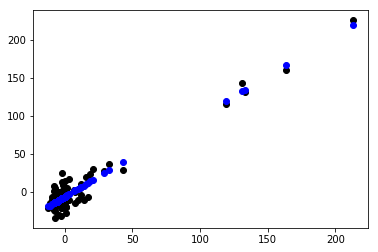

In [4]:
plt.plot(X[1:100], Y[1:1000], 'o', color = "black")
plt.plot(X[1:100], Y_pred[1:1000], 'o', color = "blue")
plt.show()

In [5]:
X = df[["AIR_TIME", "DISTANCE", "TAXI_IN", "TAXI_OUT"]]

df["MONTH"] = df["MONTH"].apply(str)
df["DAY"] = df["DAY"].apply(str)
df["DAY_OF_WEEK"] = df["DAY_OF_WEEK"].apply(str)

dummies = pd.get_dummies(data = df[['MONTH', 'DAY', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']])

X = dummies.add(X, fill_value = 0)

In [11]:
X.head()

,AIR_TIME,DAY_1,DAY_OF_WEEK_4,DEPARTURE_DELAY,DESTINATION_AIRPORT_ATL,DESTINATION_AIRPORT_BNA,DESTINATION_AIRPORT_BUF,DESTINATION_AIRPORT_CLT,DESTINATION_AIRPORT_DEN,DESTINATION_AIRPORT_DFW,...,ORIGIN_AIRPORT_SEA,ORIGIN_AIRPORT_SFO,ORIGIN_AIRPORT_SJC,ORIGIN_AIRPORT_SLC,ORIGIN_AIRPORT_SNA,ORIGIN_AIRPORT_TPA,ORIGIN_AIRPORT_TUL,ORIGIN_AIRPORT_XNA,TAXI_IN,TAXI_OUT
363,292.0,1.0,1.0,-9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,17.0
302,209.0,1.0,1.0,-8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,15.0
858,94.0,1.0,1.0,-5.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,10.0
504,78.0,1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,28.0
904,320.0,1.0,1.0,-11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,12.0


In [6]:
X.columns

Index(['AIR_TIME', 'DAY_1', 'DAY_OF_WEEK_4', 'DESTINATION_AIRPORT_ATL',
       'DESTINATION_AIRPORT_BNA', 'DESTINATION_AIRPORT_BUF',
       'DESTINATION_AIRPORT_CLT', 'DESTINATION_AIRPORT_DEN',
       'DESTINATION_AIRPORT_DFW', 'DESTINATION_AIRPORT_DTW',
       'DESTINATION_AIRPORT_EWR', 'DESTINATION_AIRPORT_FLL',
       'DESTINATION_AIRPORT_HNL', 'DESTINATION_AIRPORT_IAH',
       'DESTINATION_AIRPORT_JAX', 'DESTINATION_AIRPORT_JFK',
       'DESTINATION_AIRPORT_LAS', 'DESTINATION_AIRPORT_LAX',
       'DESTINATION_AIRPORT_LGA', 'DESTINATION_AIRPORT_LIH',
       'DESTINATION_AIRPORT_MCO', 'DESTINATION_AIRPORT_MIA',
       'DESTINATION_AIRPORT_MSP', 'DESTINATION_AIRPORT_ONT',
       'DESTINATION_AIRPORT_ORD', 'DESTINATION_AIRPORT_PHX',
       'DESTINATION_AIRPORT_PSP', 'DESTINATION_AIRPORT_RIC',
       'DESTINATION_AIRPORT_SEA', 'DESTINATION_AIRPORT_SFO',
       'DESTINATION_AIRPORT_SLC', 'DESTINATION_AIRPORT_TPA',
       'DESTINATION_AIRPORT_TTN', 'DISTANCE', 'MONTH_1', 'ORIGIN_AIRPORT_A

In [7]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

Y_pred = regr.predict(X)
print("R cuadrado: ", r2_score(Y, Y_pred))

R cuadrado:  0.9578441674827936


In [8]:
X = X.add(df[['DEPARTURE_DELAY']], fill_value = 0)#hace cero valores perdidos

In [9]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

Y_pred = regr.predict(X)
print("R cuadrado: ", r2_score(Y, Y_pred))

R cuadrado:  0.9988913785282569


LOGISTIC

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [13]:
Y = df["ARRIVAL_DELAY"] < 30
X = df[["DEPARTURE_DELAY"]]

In [14]:
logreg = LogisticRegression()
logreg.fit(X, Y)
Y_pred = logreg.predict(X)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
np.round(logreg.predict_proba(X), 3)

array([[0.021, 0.979],
       [0.023, 0.977],
       [0.029, 0.971],
       [0.039, 0.961],
       [0.018, 0.982],
       [0.042, 0.958],
       [0.042, 0.958],
       [0.031, 0.969],
       [0.036, 0.964],
       [0.045, 0.955],
       [0.052, 0.948],
       [0.029, 0.971],
       [0.017, 0.983],
       [0.029, 0.971],
       [0.036, 0.964],
       [0.031, 0.969],
       [0.538, 0.462],
       [0.036, 0.964],
       [0.285, 0.715],
       [0.069, 0.931],
       [0.036, 0.964],
       [0.025, 0.975],
       [0.025, 0.975],
       [0.042, 0.958],
       [0.045, 0.955],
       [0.052, 0.948],
       [0.027, 0.973],
       [0.999, 0.001],
       [0.031, 0.969],
       [0.036, 0.964],
       [0.098, 0.902],
       [0.025, 0.975],
       [1.   , 0.   ],
       [0.023, 0.977],
       [0.029, 0.971],
       [0.048, 0.952],
       [0.033, 0.967],
       [0.085, 0.915],
       [0.033, 0.967],
       [0.042, 0.958],
       [0.027, 0.973],
       [0.021, 0.979],
       [1.   , 0.   ],
       [0.0

In [17]:
np.mean(Y_pred == Y)

0.97

In [18]:
np.mean(Y)

0.93

In [19]:
confusion_matrix = confusion_matrix(Y, Y_pred)
print(confusion_matrix)

[[ 5  2]
 [ 1 92]]


NAIVE BAYES

In [21]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

In [22]:
Y = df["ARRIVAL_DELAY"] > 0

In [23]:
df["MONTH"] = df["MONTH"].apply(str)
df["DAY"] = df["DAY"].apply(str)
df["DAY_OF_WEEK"] = df["DAY_OF_WEEK"].apply(str)
df["TAIL_NUMBER"] = df["TAIL_NUMBER"].apply(str)

X = pd.get_dummies(data = df[["MONTH", "DAY", "DAY_OF_WEEK", "ORIGIN_AIRPORT", "DESTINATION_AIRPORT"]])

In [24]:
clf = BernoulliNB()
clf.fit(X, Y)
Y_pred = clf.predict(X)

In [26]:
np.mean(Y == Y_pred)

0.78

In [28]:
1-np.mean(Y)

0.72

In [29]:
X = df[["AIR_TIME", "DISTANCE", "TAXI_IN", "TAXI_OUT", "DEPARTURE_DELAY"]]
clf = GaussianNB()
clf.fit(X, Y)
Y_pred = clf.predict(X)

In [31]:
np.mean(Y == Y_pred)

0.82